In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os
import pickle
import re

import evaluation

import pandas as pd


/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/
max t4t frac:  0.9812206572769953
mean t4t frac:  0.9383814634886359
std t4t frac:  0.09469476249529336
/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/
max t4t frac:  0.9812206572769953
mean t4t frac:  0.9373633011759246
std t4t frac:  0.0973963090053479


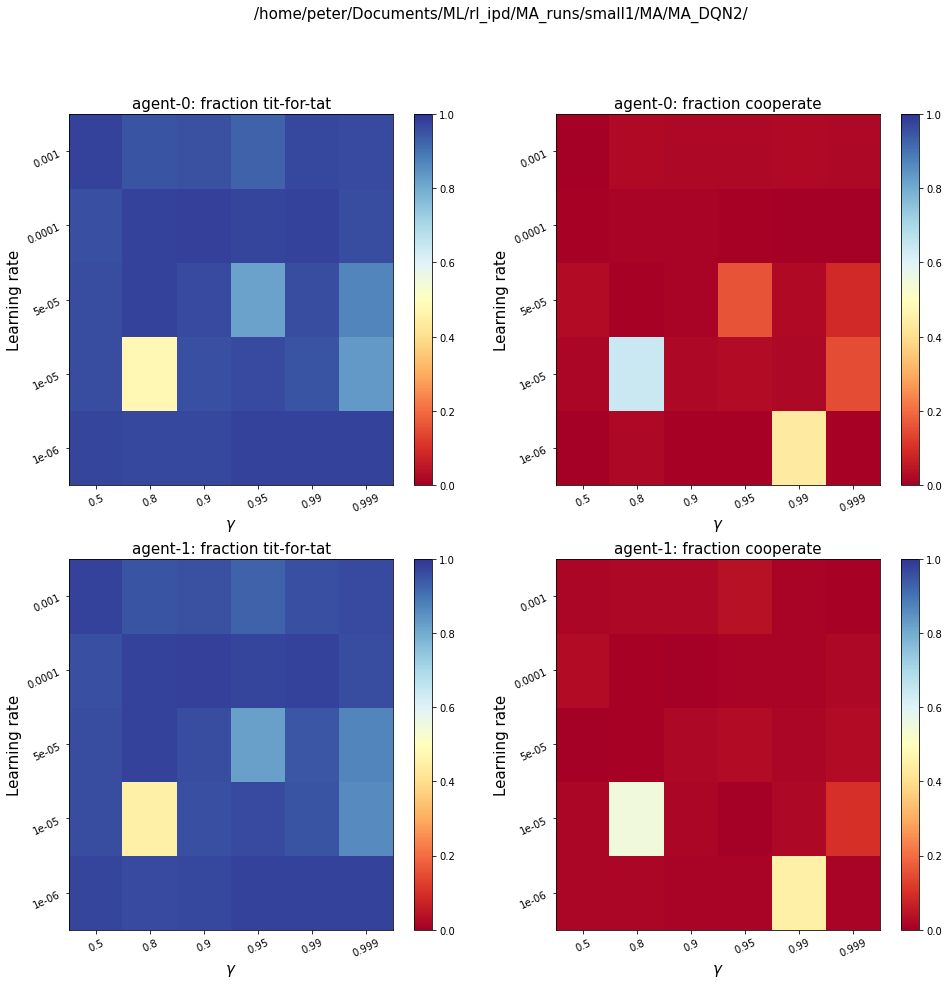

In [26]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']

# exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

# exp_dirs = ['/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_DQN2/', 
#             '/home/peter/Documents/ML/rl_ipd/more_runs/MA_random_length_nodoneatend_DQN2/']
# titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']
# exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(exp_dir + 'data_save_play_agents')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


0
MA_random_length_PPO2/
max t4t frac:  0.6016949152542372
mean t4t frac:  0.4983150646693801
std t4t frac:  0.057426045843935444
1
MA_random_length_PPO2/
max t4t frac:  0.5984848484848485
mean t4t frac:  0.5115076456703322
std t4t frac:  0.04442849808692377
0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.6255924170616114
mean t4t frac:  0.5093358255911237
std t4t frac:  0.0480978815061916
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.6113744075829384
mean t4t frac:  0.5019467946275392
std t4t frac:  0.05650257635169125


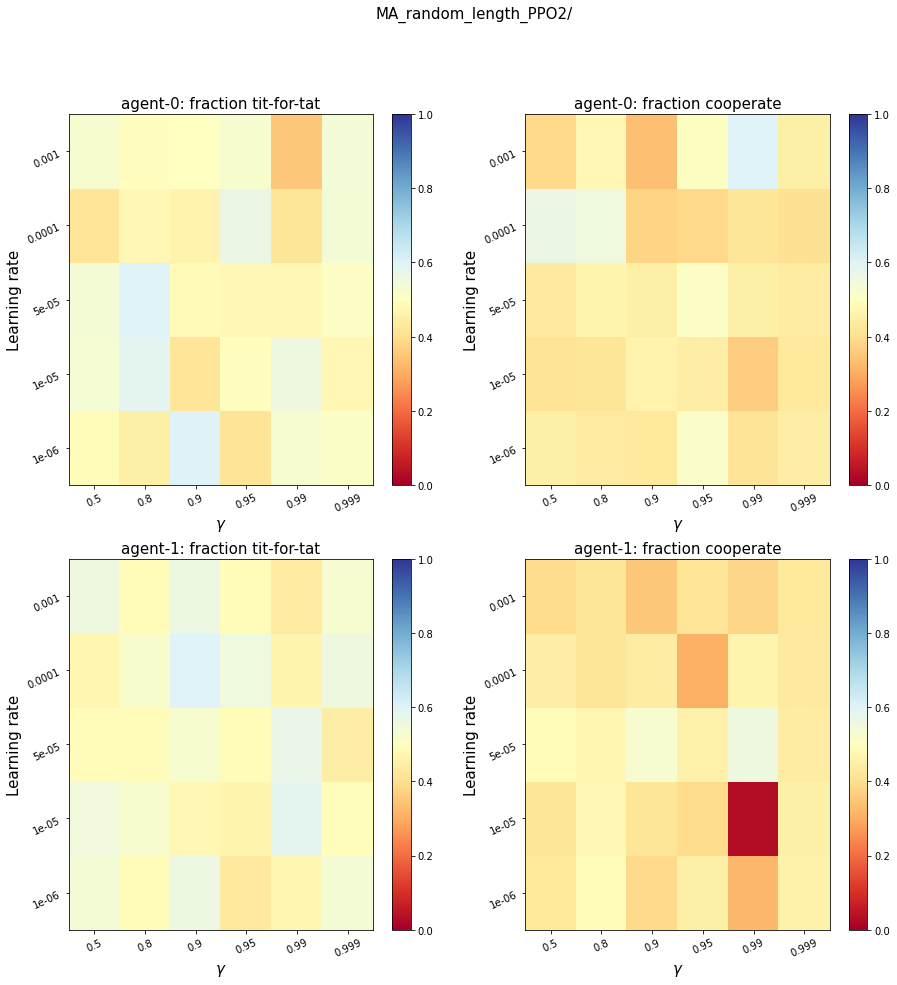

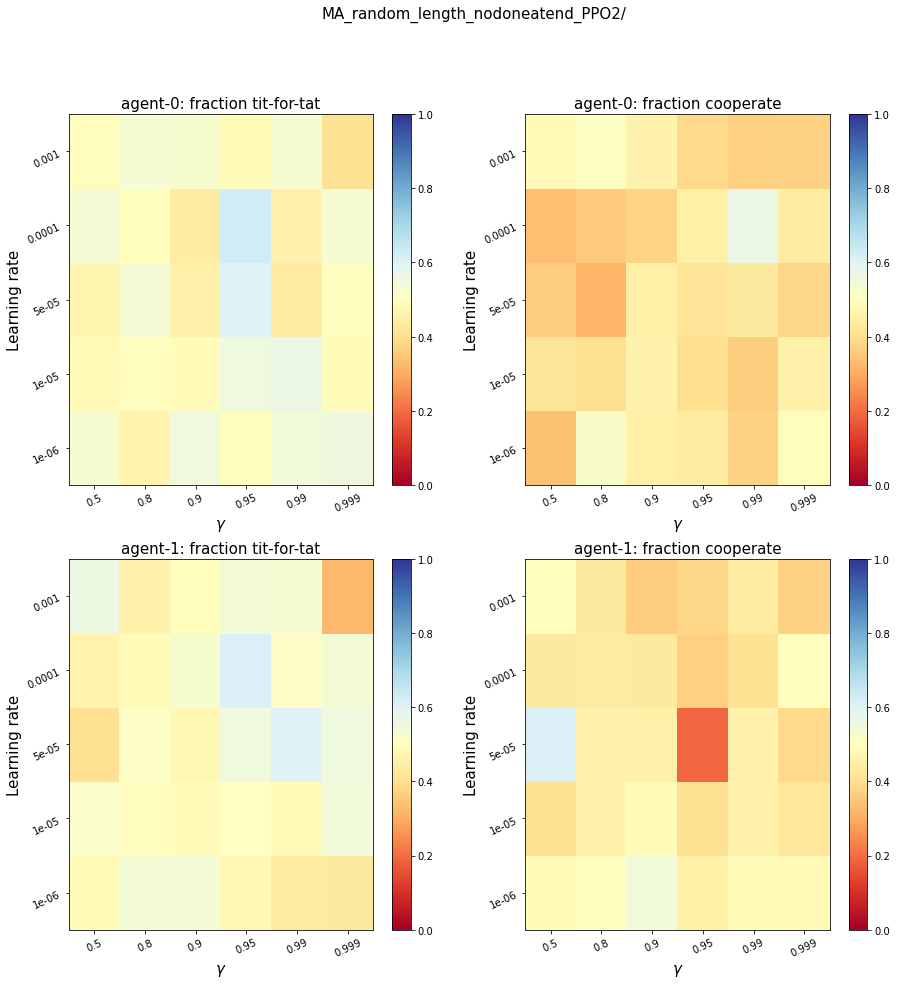

In [27]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']


base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_PPO2/', 
            'MA_random_length_nodoneatend_PPO2/']
titles=['PPO, hiddens=[1024,512,256,32,8]', 'PPO, hiddens=[1024,512,256,32,8],no done']
exp_dirs = ['MA_random_length_PPO2/', 'MA_random_length_nodoneatend_PPO2/']
titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


MA_random_length_DQN2/
max t4t frac:  0.9838056680161943
mean t4t frac:  0.9644342550838853
std t4t frac:  0.01081311842679251
MA_random_length_DQN2/
max t4t frac:  0.9838056680161943
mean t4t frac:  0.9661846810407911
std t4t frac:  0.010766749477951436
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.9870967741935484
mean t4t frac:  0.9578197628149521
std t4t frac:  0.030563749113994922
MA_random_length_nodoneatend_DQN2_2/
max t4t frac:  0.9870967741935484
mean t4t frac:  0.9568440387460603
std t4t frac:  0.03414270539441112
MA_random_length_DQN3/
max t4t frac:  0.9877049180327869
mean t4t frac:  0.9351629649012531
std t4t frac:  0.1389052980751454
MA_random_length_DQN3/
max t4t frac:  0.9877049180327869
mean t4t frac:  0.9284969839436282
std t4t frac:  0.16326212046332303


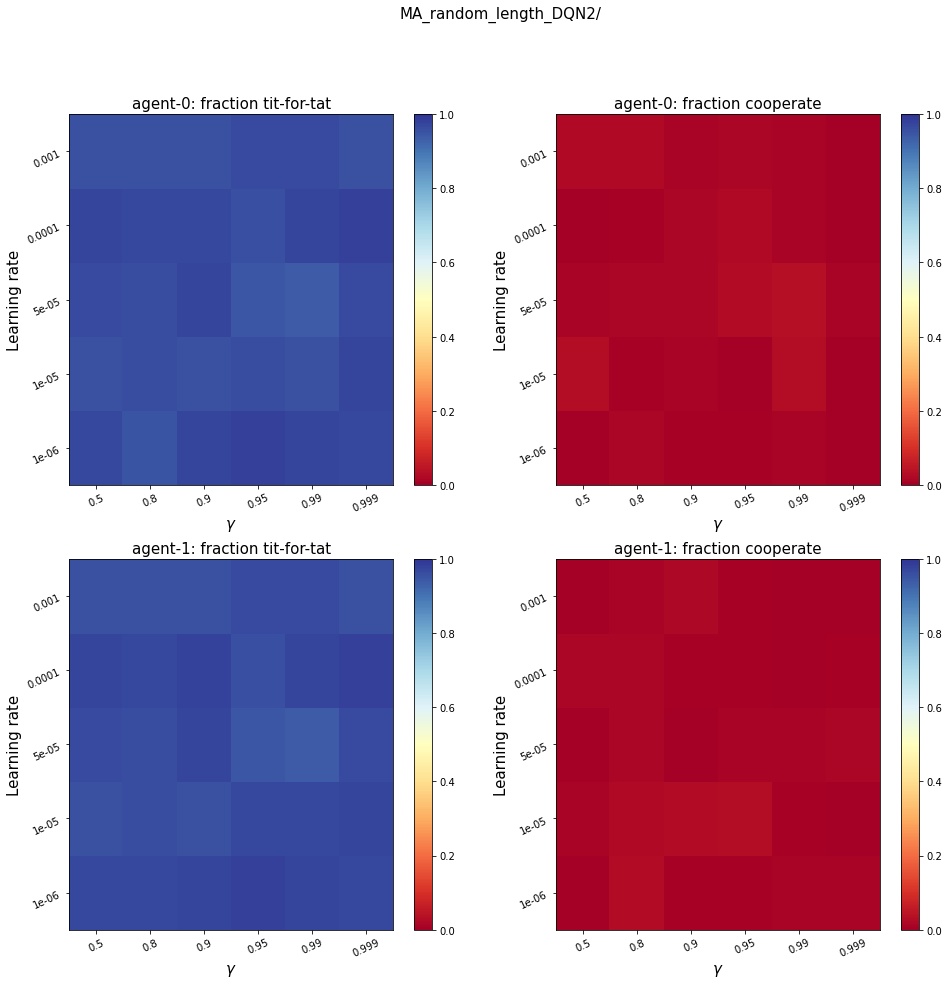

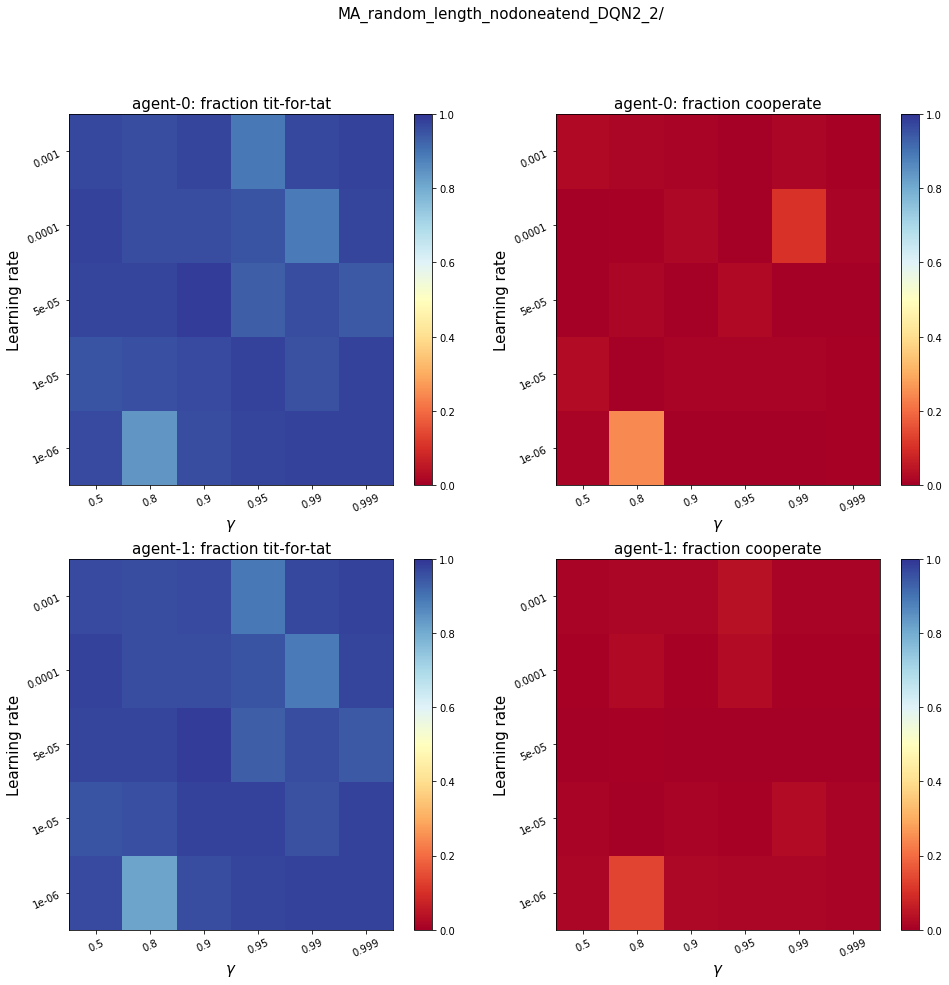

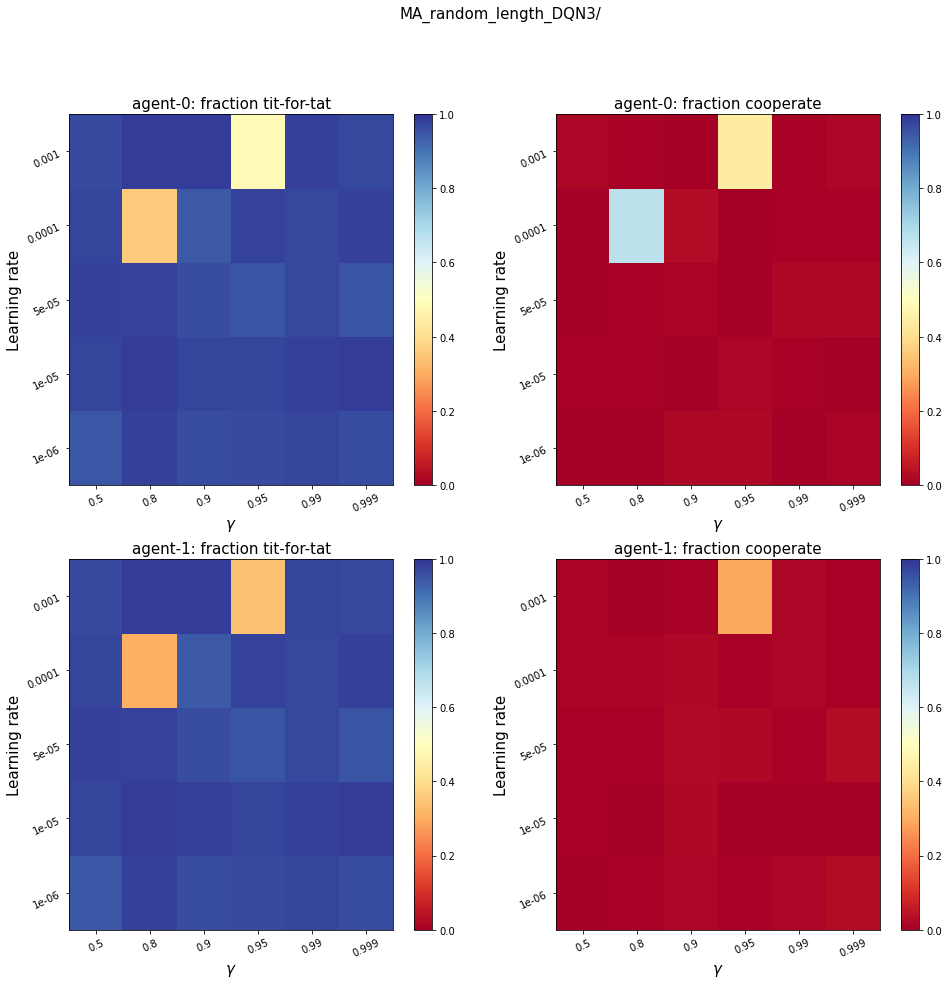

In [28]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/', 
            'MA_random_length_nodoneatend_DQN2/']
titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']
exp_dirs = ['MA_random_length_DQN2/', 'MA_random_length_nodoneatend_DQN2_2/','MA_random_length_DQN3/']


titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


0
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.6255924170616114
mean t4t frac:  0.5093358255911237
std t4t frac:  0.0480978815061916
1
MA_random_length_nodoneatend_PPO2/
max t4t frac:  0.6113744075829384
mean t4t frac:  0.5019467946275392
std t4t frac:  0.05650257635169125
0
MA_random_length_PPO2/
max t4t frac:  0.6016949152542372
mean t4t frac:  0.4983150646693801
std t4t frac:  0.057426045843935444
1
MA_random_length_PPO2/
max t4t frac:  0.5984848484848485
mean t4t frac:  0.5115076456703322
std t4t frac:  0.04442849808692377


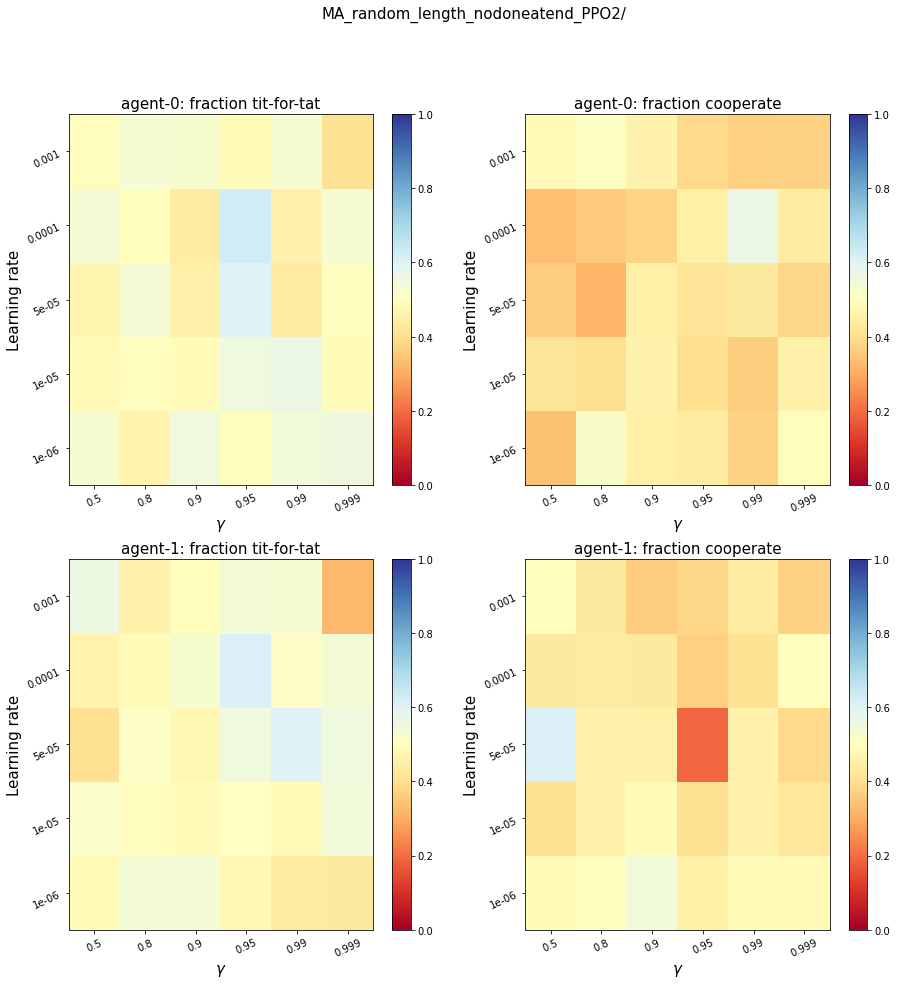

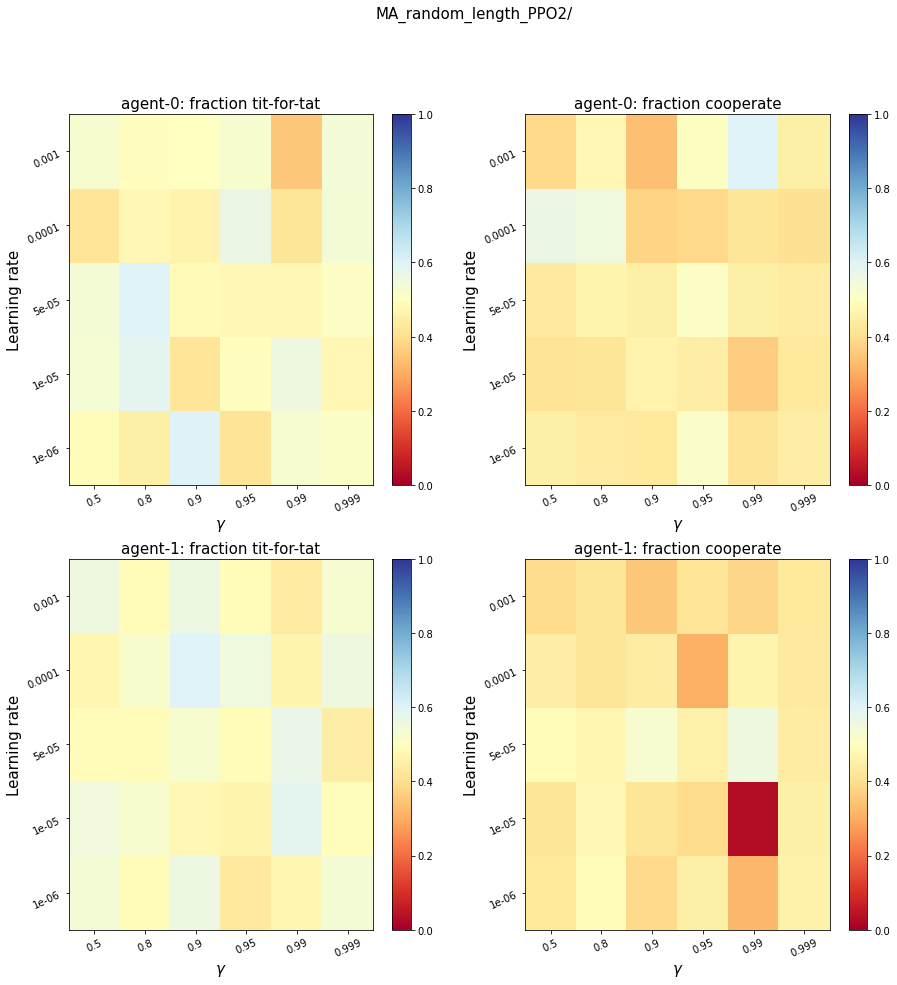

In [29]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_nodoneatend_PPO2/','MA_random_length_PPO2/']
# exp_dirs = ['MA_PPO2/']

titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
#     print(data1)
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [30]:
data1

,ID,gamma,lr,episode_reward_max,episode_reward_min,episode_reward_mean,coop_frac0,coop_frac1,final_episode_reward_max,final_episode_reward_mean,final_episode_reward_min,t4t_frac0,t4t_frac1
0,"PPO_two_agent_MG_env_81b79_00008_8_gamma=0.95,...",0.950,0.000100,"[450.0, 450.0, 428.0, 425.0, 401.0, 408.0, 407...","[2.0, 5.0, 5.0, 2.0, 5.0, 2.0, 4.0, 19.0, 2.0,...","[211.47619047619048, 211.64, 218.84, 217.35, 1...",0.390152,0.306818,361.0,147.87,5.0,0.564394,0.553030
1,"PPO_two_agent_MG_env_81b79_00009_9_gamma=0.9,l...",0.900,0.000100,"[450.0, 428.0, 440.0, 429.0, 438.0, 429.0, 433...","[2.0, 2.0, 11.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0,...","[219.23456790123456, 225.81, 247.35, 238.02, 2...",0.378788,0.439394,436.0,248.85,14.0,0.462121,0.598485
2,"PPO_two_agent_MG_env_81b79_00016_16_gamma=0.8,...",0.800,0.000050,"[457.0, 457.0, 449.0, 452.0, 452.0, 460.0, 460...","[7.0, 7.0, 5.0, 5.0, 5.0, 7.0, 5.0, 8.0, 7.0, ...","[225.5443037974684, 232.07, 233.01, 220.37, 22...",0.464968,0.471338,418.0,233.76,2.0,0.598726,0.490446
3,"PPO_two_agent_MG_env_81b79_00017_17_gamma=0.5,...",0.500,0.000050,"[457.0, 425.0, 444.0, 440.0, 459.0, 459.0, 453...","[9.0, 11.0, 10.0, 5.0, 2.0, 13.0, 6.0, 23.0, 7...","[232.55263157894737, 213.27, 207.18, 226.43, 2...",0.432990,0.484536,464.0,236.23,5.0,0.536082,0.484536
4,"PPO_two_agent_MG_env_81b79_00011_11_gamma=0.5,...",0.500,0.000100,"[434.0, 443.0, 448.0, 457.0, 457.0, 453.0, 463...","[18.0, 2.0, 2.0, 39.0, 5.0, 2.0, 7.0, 8.0, 2.0...","[211.4047619047619, 239.16, 240.79, 225.06, 21...",0.566265,0.441767,455.0,219.14,2.0,0.417671,0.469880
5,"PPO_two_agent_MG_env_81b79_00027_27_gamma=0.9,...",0.900,0.000001,"[452.0, 439.0, 437.0, 437.0, 429.0, 417.0, 408...","[2.0, 5.0, 5.0, 5.0, 5.0, 10.0, 6.0, 5.0, 5.0,...","[213.40963855421683, 220.47, 193.34, 199.91, 2...",0.426554,0.389831,366.0,147.31,2.0,0.601695,0.562147
6,PPO_two_agent_MG_env_81b79_00024_24_gamma=0.99...,0.999,0.000001,"[438.0, 452.0, 474.0, 455.0, 432.0, 457.0, 457...","[2.0, 6.0, 5.0, 5.0, 12.0, 2.0, 2.0, 12.0, 4.0...","[202.875, 228.31, 232.79, 239.75, 215.32, 214....",0.443878,0.454082,410.0,187.59,2.0,0.515306,0.535714
7,PPO_two_agent_MG_env_81b79_00012_12_gamma=0.99...,0.999,0.000050,"[451.0, 458.0, 472.0, 452.0, 438.0, 438.0, 439...","[5.0, 10.0, 10.0, 4.0, 9.0, 6.0, 6.0, 6.0, 2.0...","[219.92592592592592, 237.72, 217.6, 233.18, 22...",0.439306,0.439306,463.0,233.36,5.0,0.508671,0.445087
8,"PPO_two_agent_MG_env_81b79_00028_28_gamma=0.8,...",0.800,0.000001,"[459.0, 445.0, 455.0, 446.0, 475.0, 457.0, 457...","[5.0, 5.0, 6.0, 11.0, 13.0, 5.0, 6.0, 6.0, 5.0...","[217.02439024390245, 229.7, 229.72, 212.87, 21...",0.434641,0.486928,438.0,232.59,5.0,0.447712,0.486928
9,"PPO_two_agent_MG_env_81b79_00007_7_gamma=0.99,...",0.990,0.000100,"[453.0, 452.0, 452.0, 441.0, 451.0, 451.0, 440...","[11.0, 16.0, 7.0, 5.0, 2.0, 10.0, 5.0, 6.0, 14...","[221.1375, 233.6, 207.24, 193.37, 211.61, 214....",0.418605,0.465116,448.0,218.16,5.0,0.418605,0.465116


MA_random_length_nodoneatend_DQN1_statelen1/
max t4t frac:  0.9863013698630136
mean t4t frac:  0.9671912048597665
std t4t frac:  0.013274435804747351
MA_random_length_nodoneatend_DQN1_statelen1/
max t4t frac:  0.9863013698630136
mean t4t frac:  0.9674038350460488
std t4t frac:  0.012629684319270694
MA_random_length_nodoneatend_DQN2_statelen1/
max t4t frac:  0.9842271293375394
mean t4t frac:  0.9669707852466717
std t4t frac:  0.013001574347166641
MA_random_length_nodoneatend_DQN2_statelen1/
max t4t frac:  0.9842271293375394
mean t4t frac:  0.9678517677208424
std t4t frac:  0.012690042920000541
MA_random_length_DQN1_statelen1/
max t4t frac:  0.9781021897810219
mean t4t frac:  0.9586755003266958
std t4t frac:  0.019076798644600435
MA_random_length_DQN1_statelen1/
max t4t frac:  0.984375
mean t4t frac:  0.9607057324511055
std t4t frac:  0.018696394373903948
MA_random_length_DQN2_statelen1/
max t4t frac:  0.9826086956521739
mean t4t frac:  0.9622222996909217
std t4t frac:  0.016286424032410

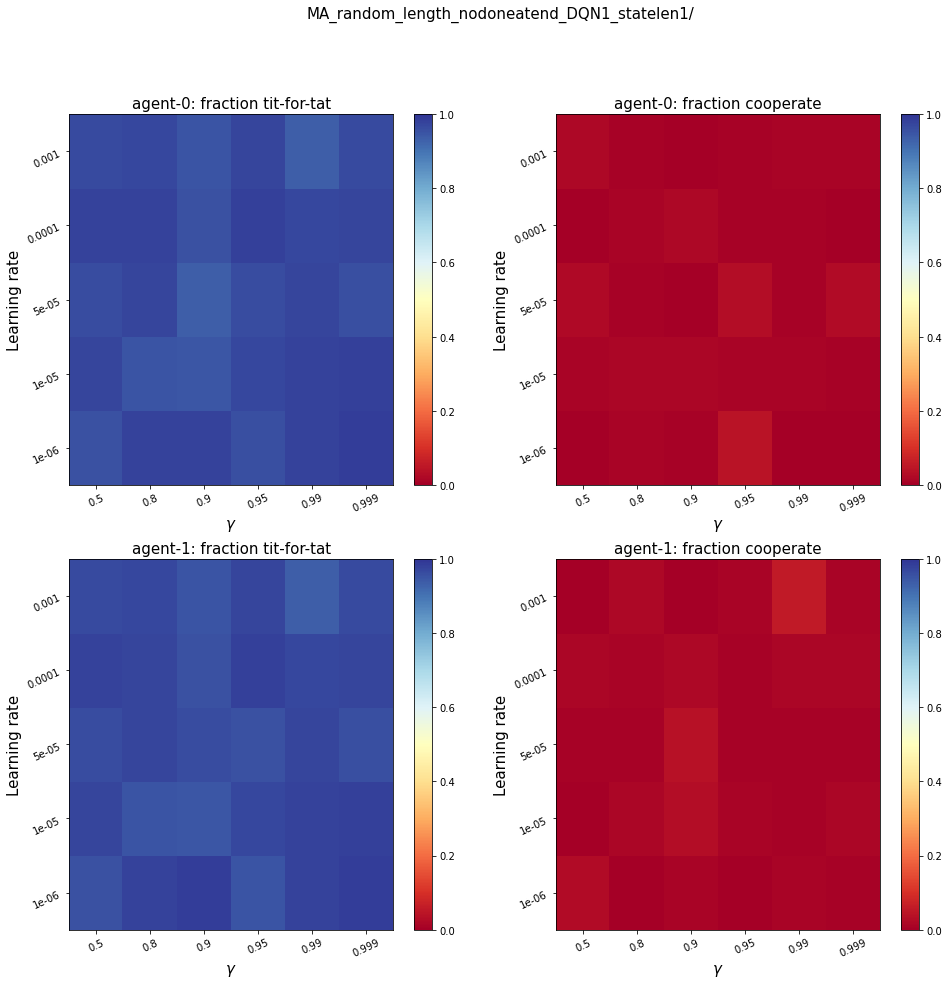

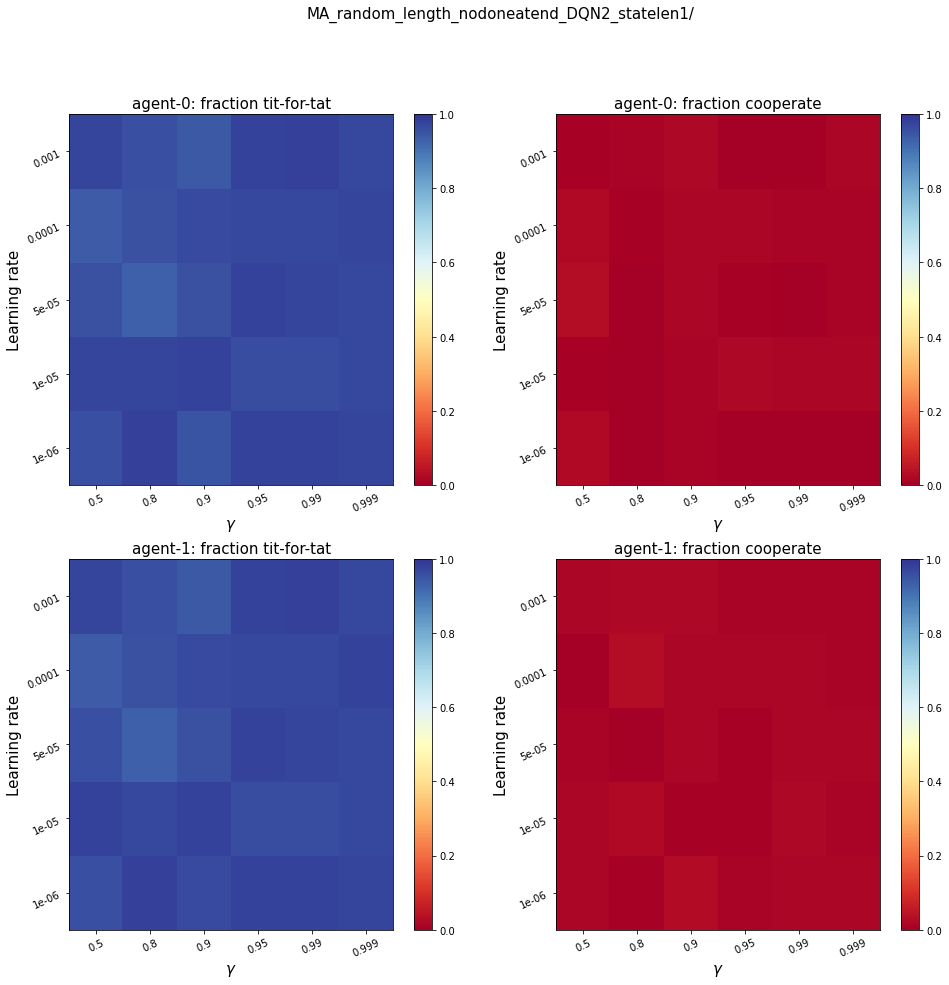

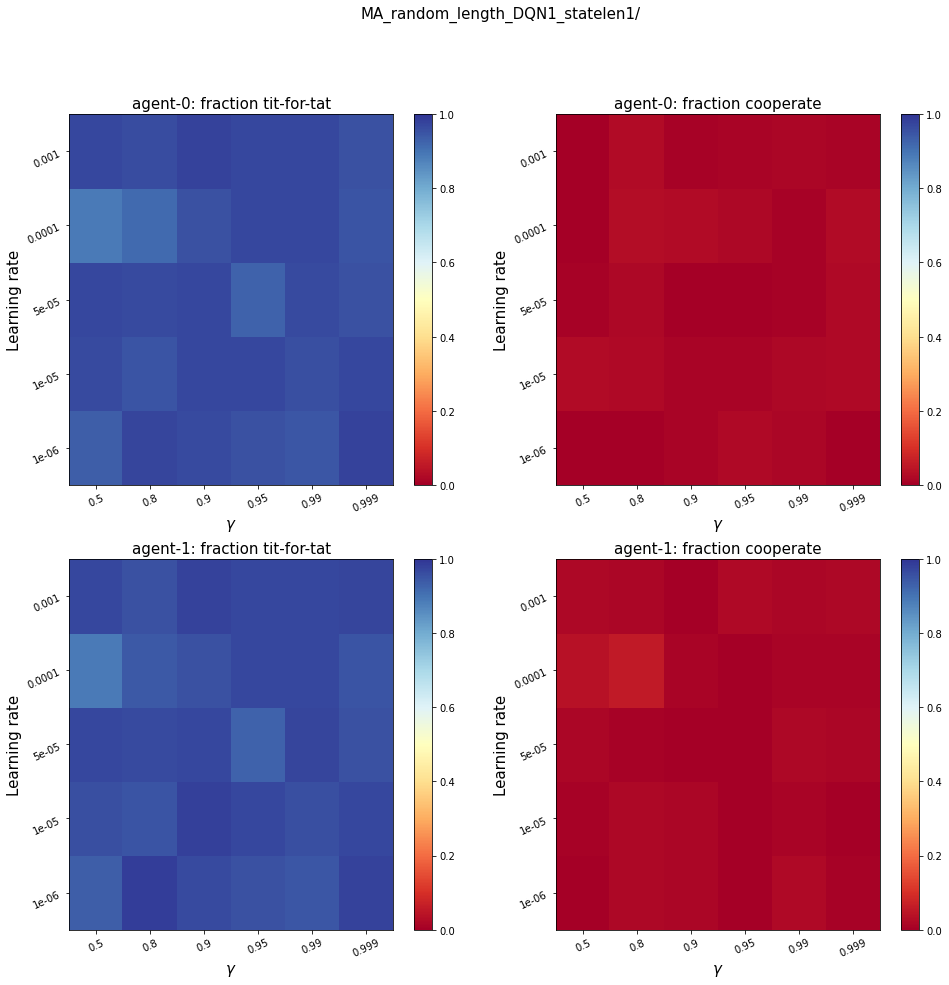

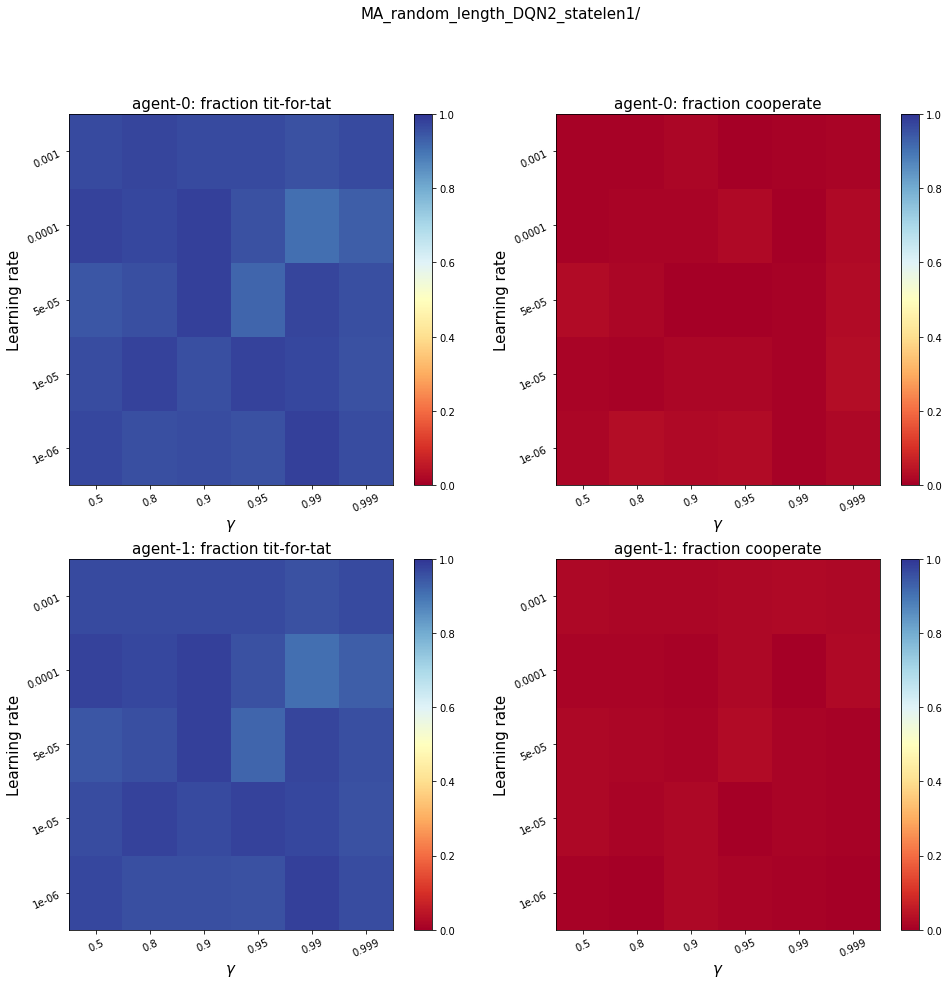

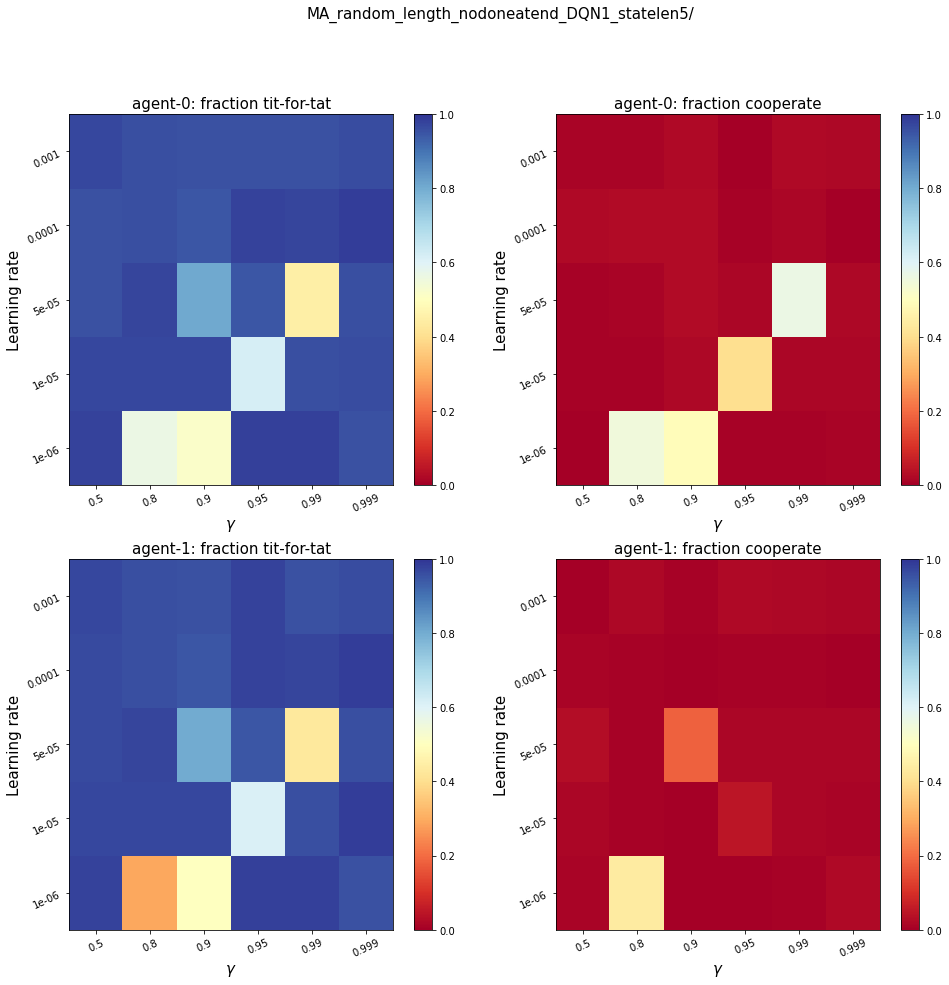

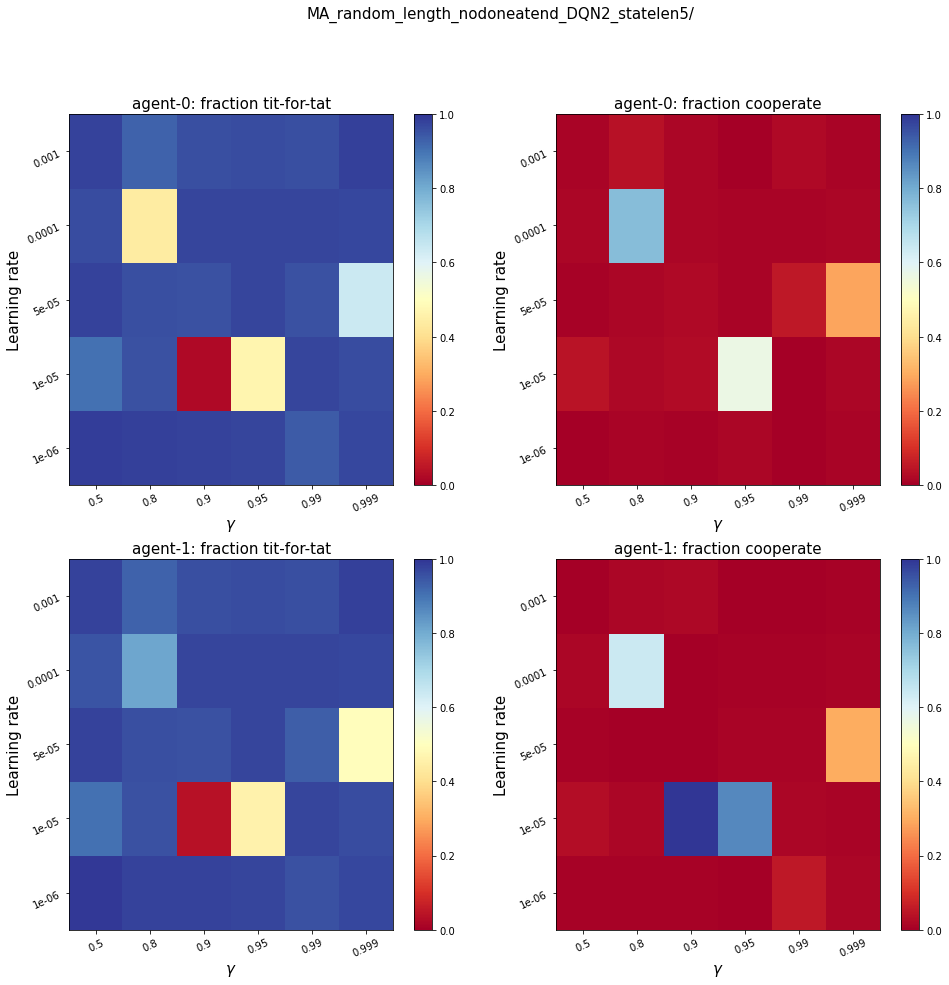

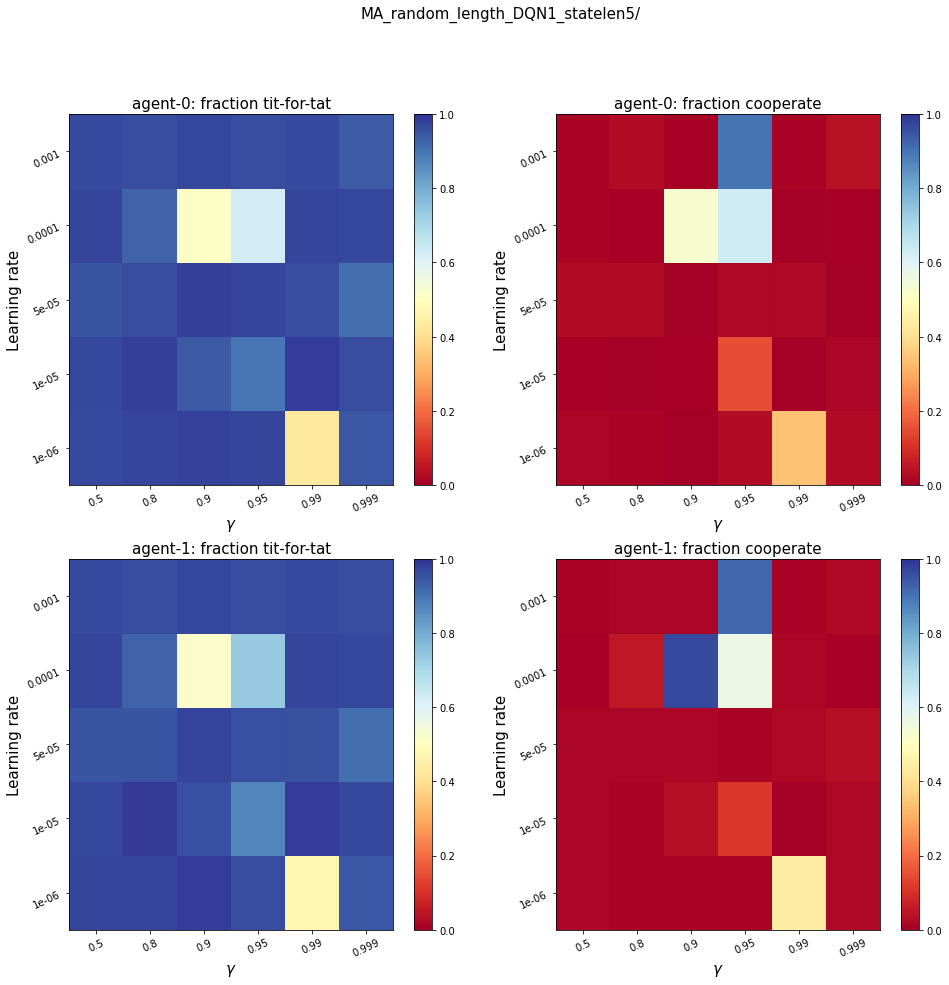

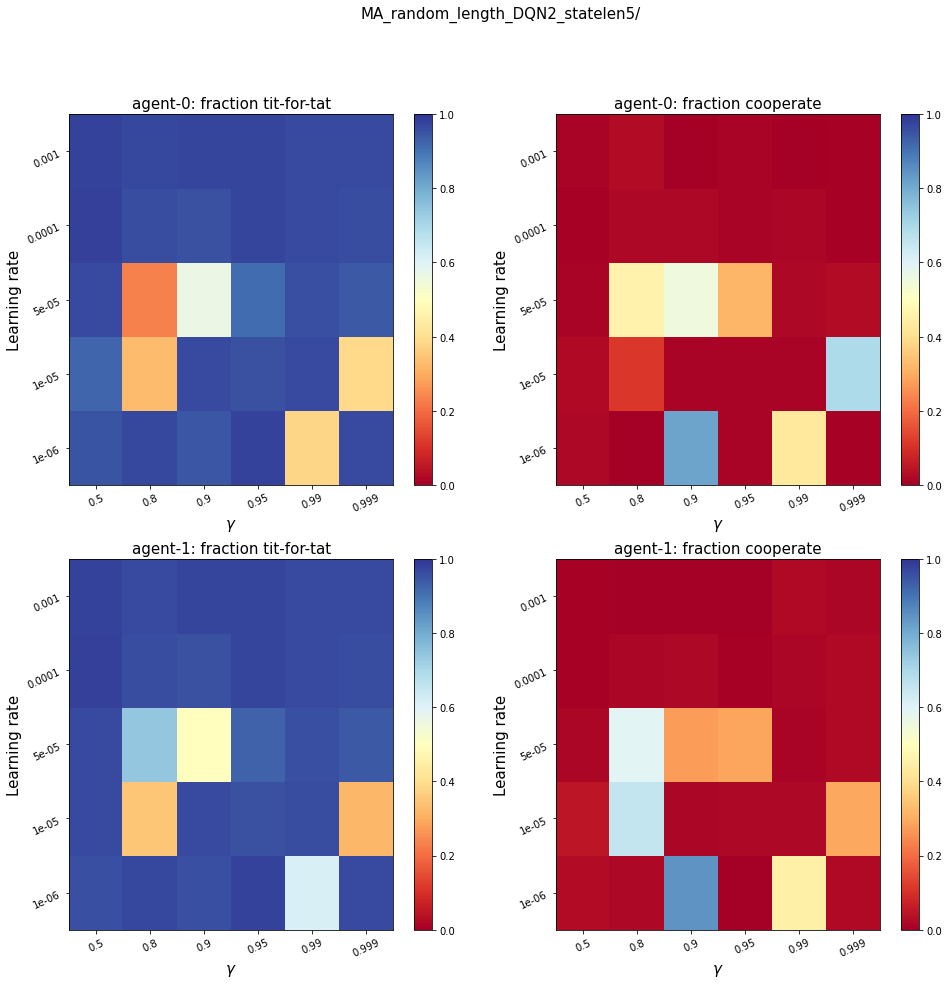

In [31]:
# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
# exp_dirs = ['MA_DQN2/']
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/MA_DQN1/',
            '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/MA_DQN2/']
exp_dirs = ['/home/peter/Documents/ML/rl_ipd/MA_no_done_at_end1/MA_DQN_no_done_at_end1/']
exp_dir = exp_dirs[0]
titles= ['DQN, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/'
exp_dirs = ['MA_random_length_DQN2/', 
            'MA_random_length_nodoneatend_DQN2/']
titles=['DQN, hiddens=[1024,512,256,32,8]', 'DQN, hiddens=[1024,512,256,32,8],no done']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
exp_dirs = [
            'MA_random_length_nodoneatend_DQN1_statelen1/',
            'MA_random_length_nodoneatend_DQN2_statelen1/',
            'MA_random_length_DQN1_statelen1/', 
            'MA_random_length_DQN2_statelen1/',
            'MA_random_length_nodoneatend_DQN1_statelen5/',
            'MA_random_length_nodoneatend_DQN2_statelen5/',
            'MA_random_length_DQN1_statelen5/', 
            'MA_random_length_DQN2_statelen5/']

# exp_dirs = ['MA_random_length_DQN1_statelen1/', 'MA_random_length_DQN2_statelen1/',
# #             'MA_random_length_nodoneatend_DQN1_statelen5/','MA_random_length_nodoneatend_DQN2_statelen5/',
#             'MA_random_length_DQN1_statelen5/', 'MA_random_length_DQN2_statelen5/']

titles = exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
    if len(data1) ==0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(16,15))

    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25,);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))


In [32]:
data1 = pd.read_pickle(base_dir + exp_dir + 'data1_save')


FileNotFoundError: [Errno 2] No such file or directory: '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/MA_random_length_DQN2_statelen5/data1_save'

In [ ]:
len(data1)

0
MA_random_length_nodoneatend_PPO1_statelen1/
max t4t frac:  0.9940298507462687
mean t4t frac:  0.9878294015478015
std t4t frac:  0.006071213014438073
1
MA_random_length_nodoneatend_PPO1_statelen1/
max t4t frac:  0.9940298507462687
mean t4t frac:  0.9880397064899678
std t4t frac:  0.006160676758462603
0
MA_random_length_nodoneatend_PPO2_statelen1/
max t4t frac:  1.0
mean t4t frac:  0.9166652063709917
std t4t frac:  0.14299331269769014
1
MA_random_length_nodoneatend_PPO2_statelen1/
max t4t frac:  0.9933333333333333
mean t4t frac:  0.9195305154799599
std t4t frac:  0.142476288610578
0
MA_random_length_nodoneatend_PPO1_statelen5/
max t4t frac:  1.0
mean t4t frac:  0.9867610161462347
std t4t frac:  0.008923723614927158
1
MA_random_length_nodoneatend_PPO1_statelen5/
max t4t frac:  0.9968847352024922
mean t4t frac:  0.9864882654011831
std t4t frac:  0.008848211673821542
0
MA_random_length_nodoneatend_PPO2_statelen5/
max t4t frac:  0.9319727891156463
mean t4t frac:  0.5415270141605328
std t4

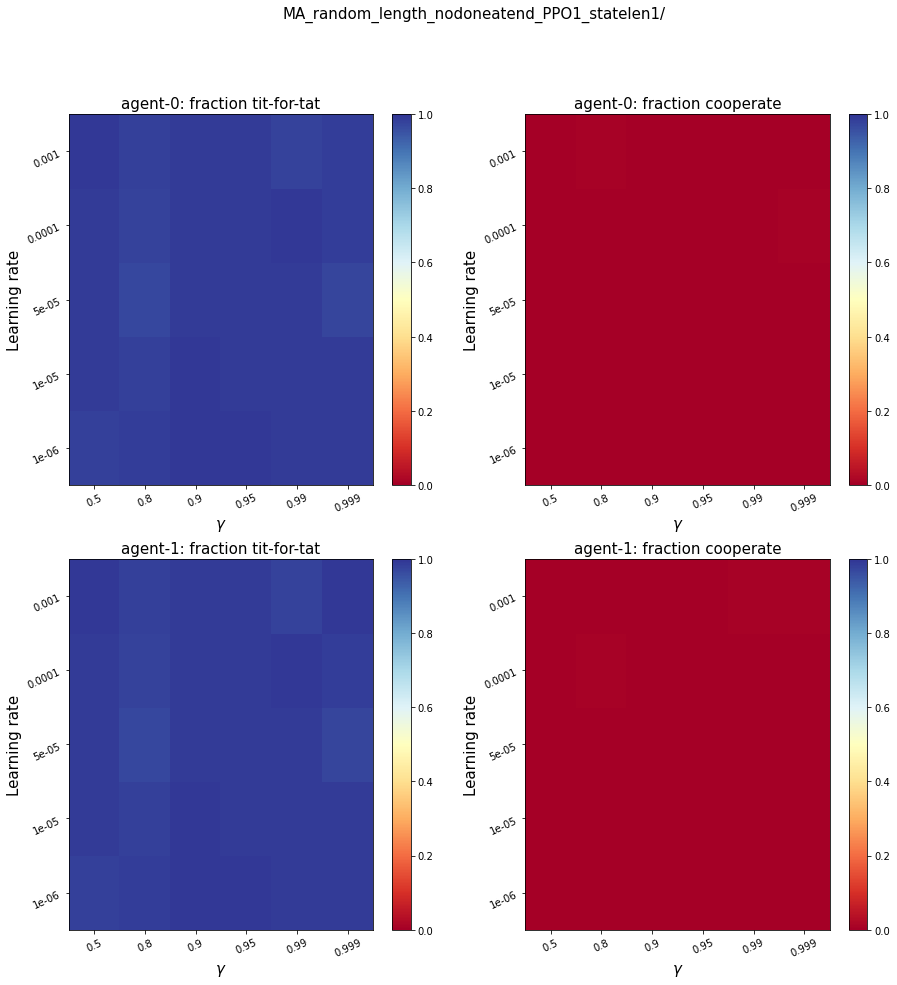

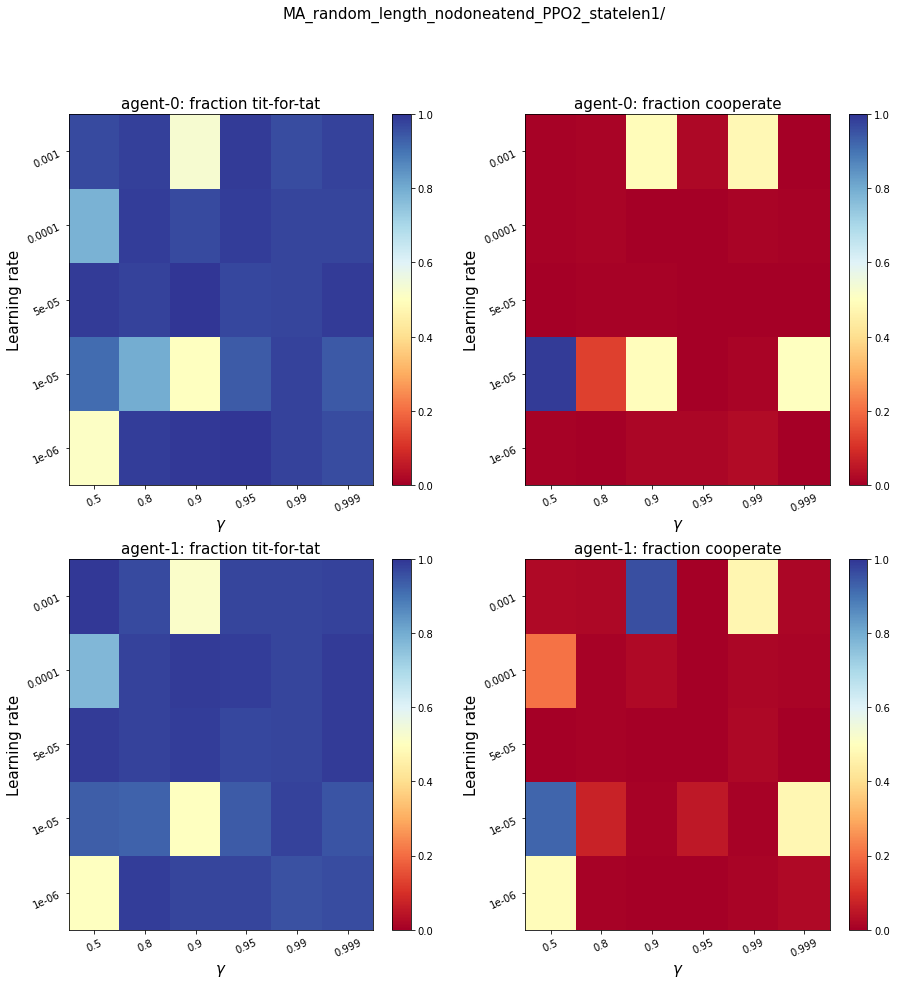

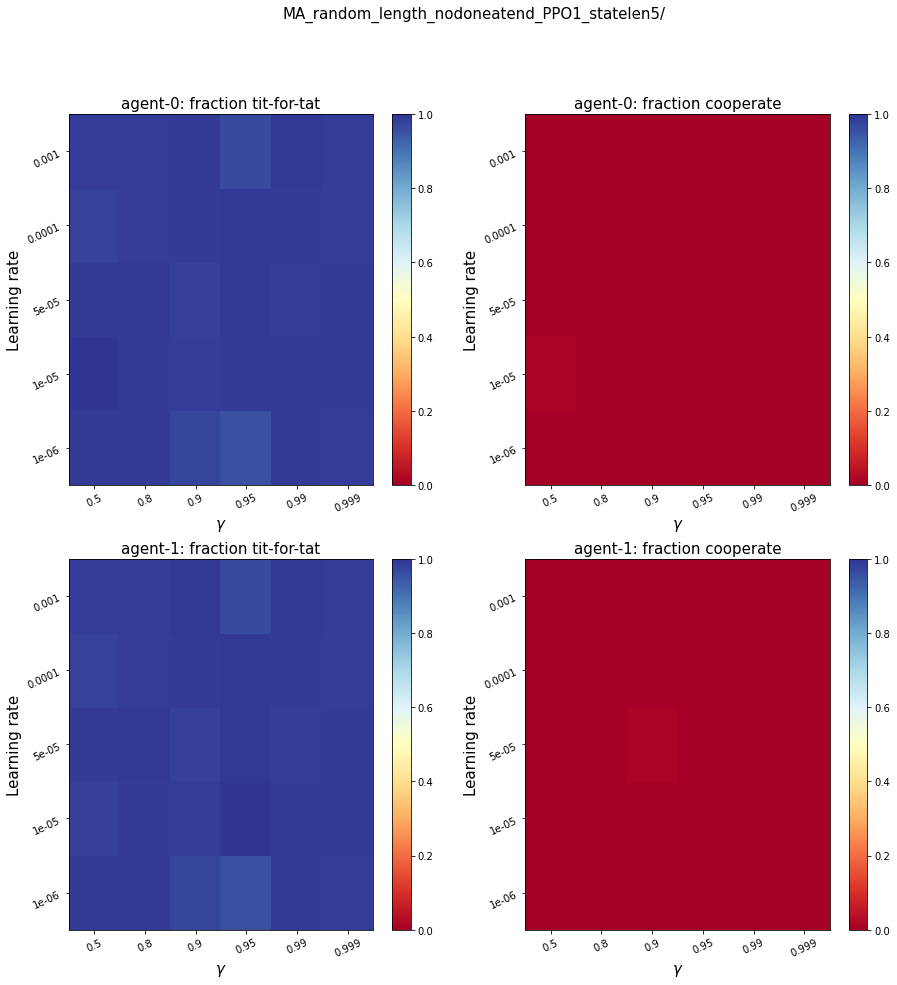

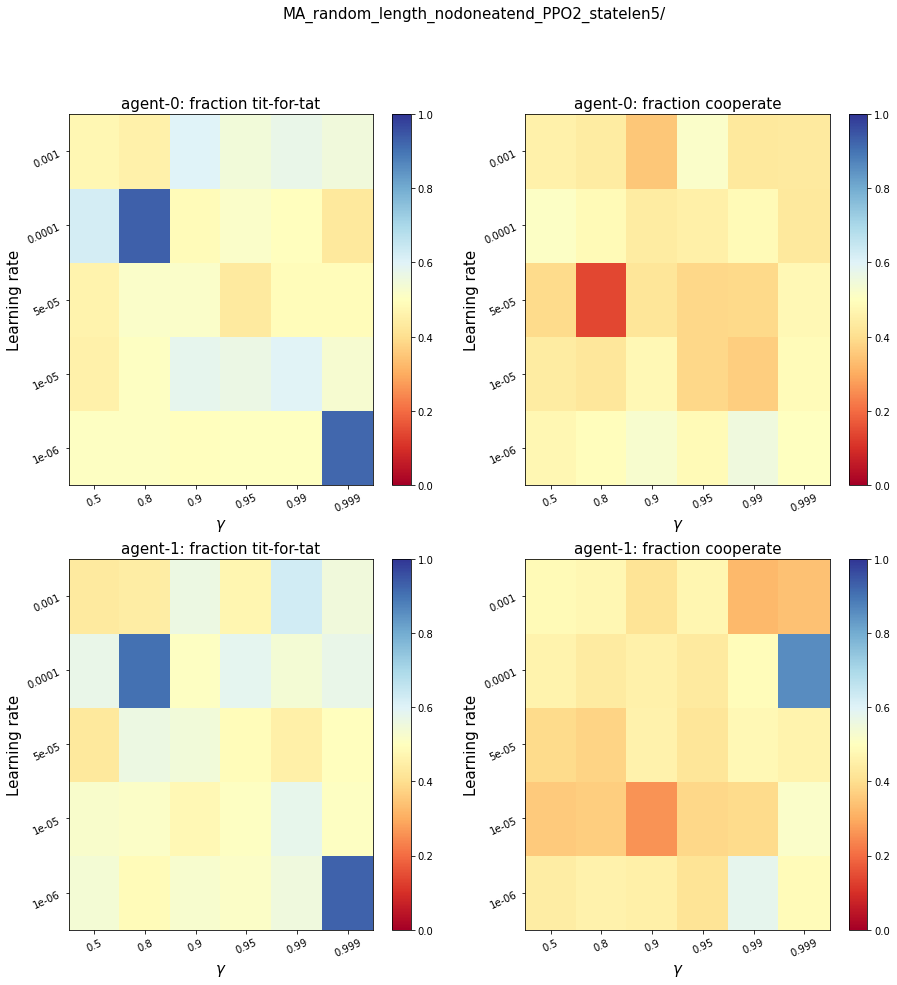

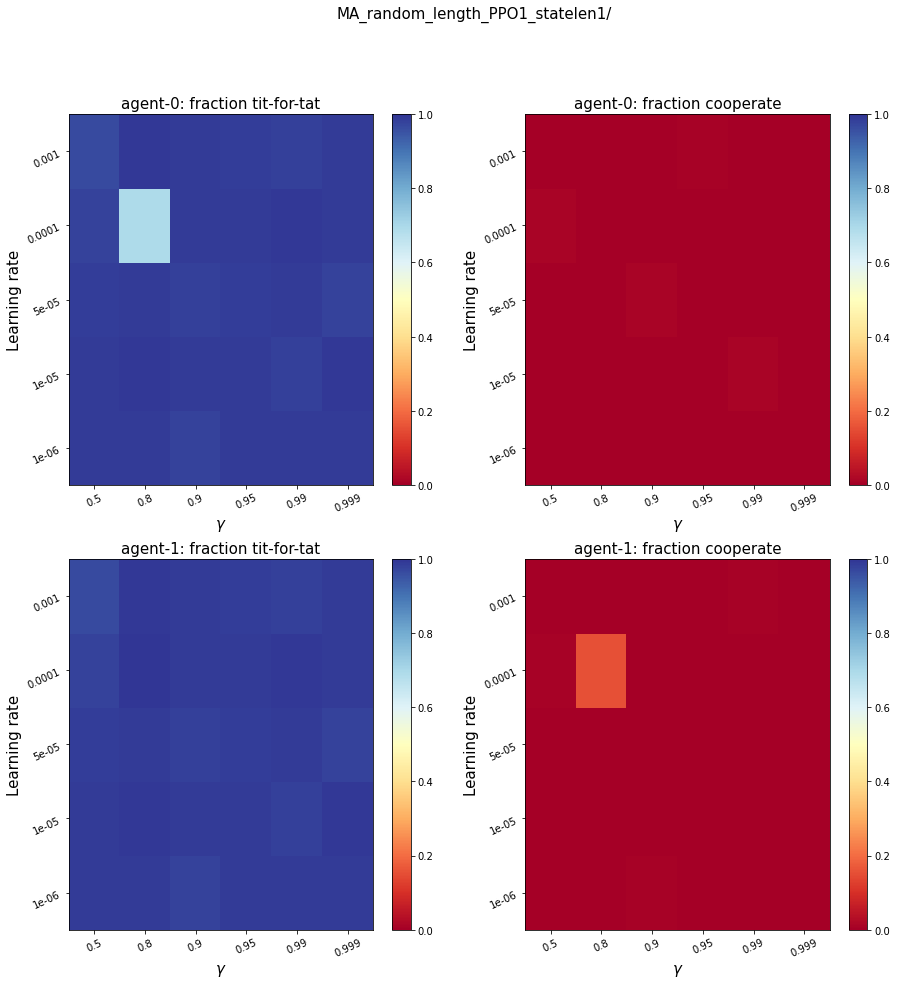

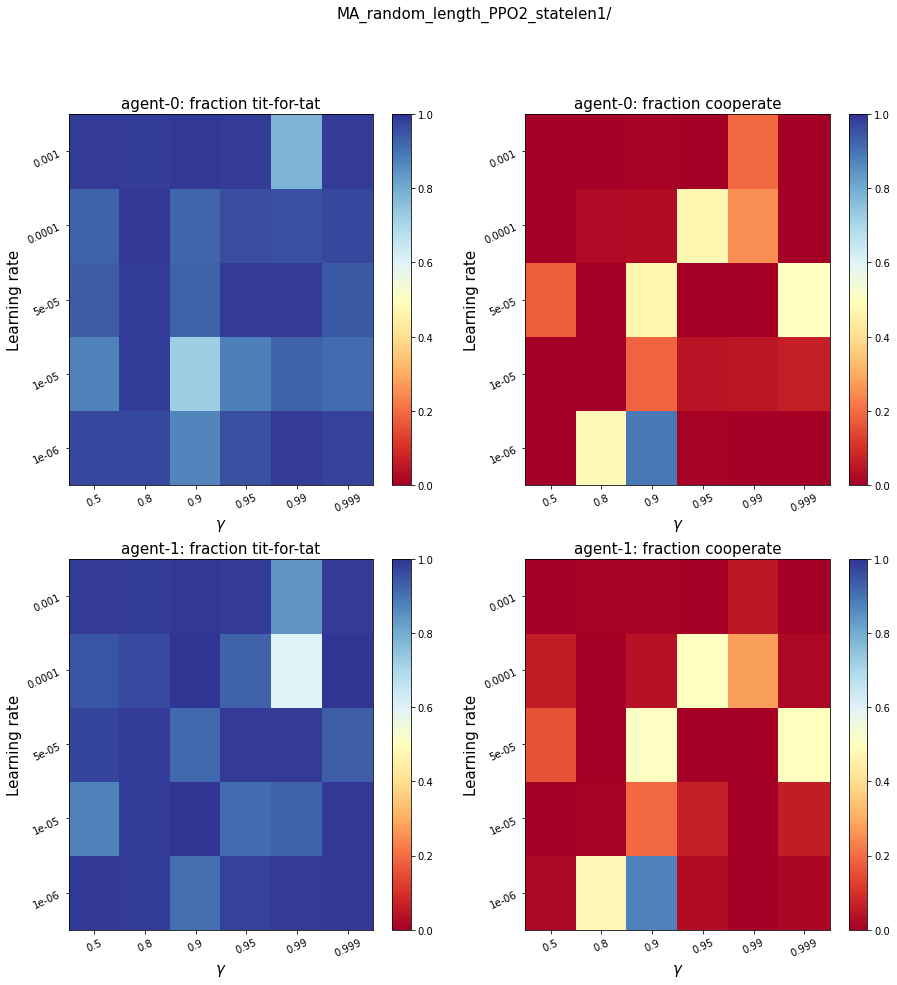

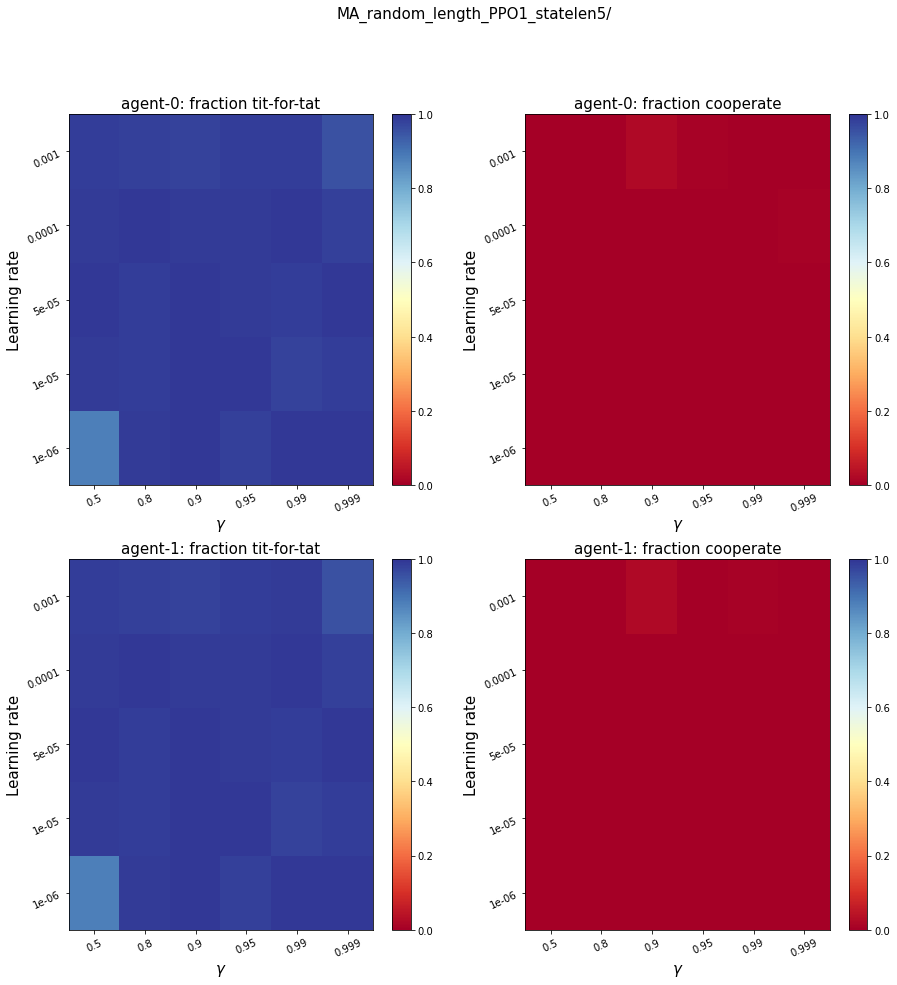

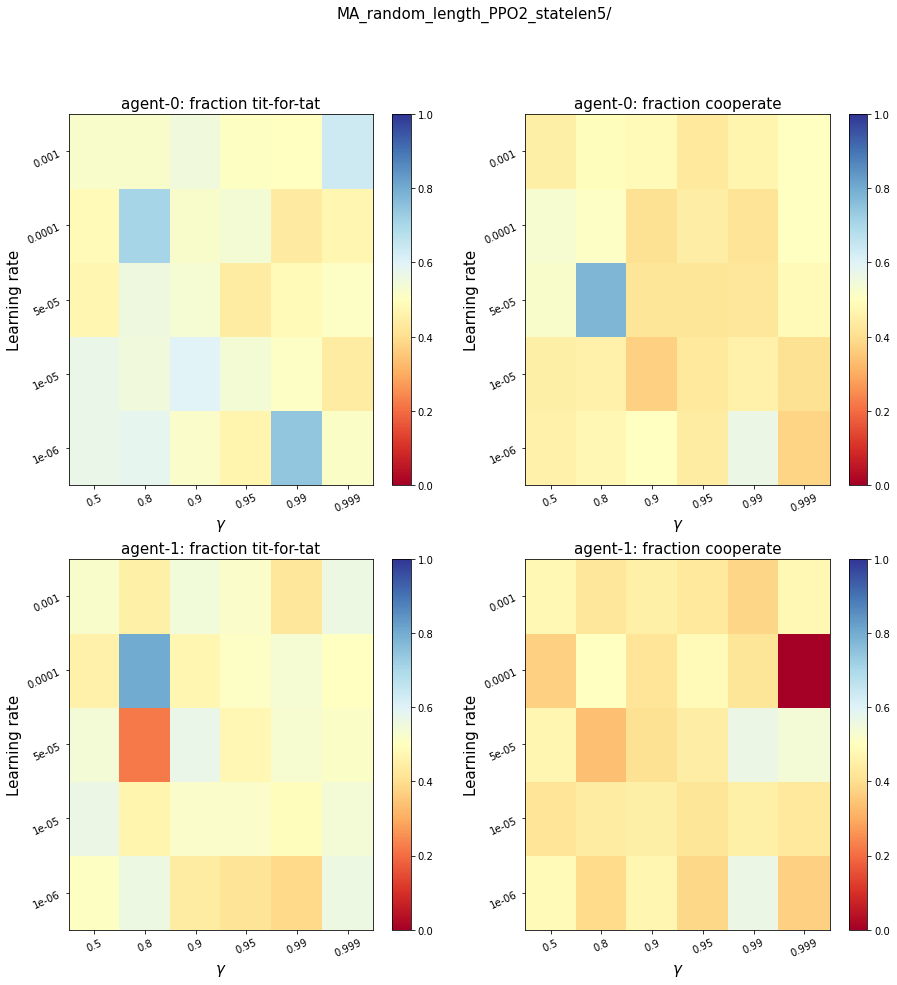

In [33]:
base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/small1/MA/'
exp_dirs = ['MA_PPO2/']

# base_dir = '/home/peter/Documents/ML/rl_ipd/MA_runs/big1/MA/'
# exp_dirs = ['MA_PPO1/']

exp_dir = exp_dirs[0]

titles= ['PPO, hiddens=[1024,512,256,32,8]']

base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_lstm/'
base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_statelen/'
exp_dirs = ['MA_random_length_nodoneatend_PPO1_statelen1/',
            'MA_random_length_nodoneatend_PPO2_statelen1/',
            'MA_random_length_nodoneatend_PPO1_statelen5/',
            'MA_random_length_nodoneatend_PPO2_statelen5/',
            'MA_random_length_PPO1_statelen1/', 
            'MA_random_length_PPO2_statelen1/',
            'MA_random_length_PPO1_statelen5/', 
            'MA_random_length_PPO2_statelen5/'
            ]


# base_dir = '/home/peter/Documents/ML/rl_ipd/more_runs/MA_ppo_rerun_rl/'

# exp_dirs = ['MA_PPO2_same/', 'MA_PPO2_diff/', 'MA_PPO2_diff_sl5/', 'MA_PPO2_diff_sl5_2/']

# exp_dirs = [exp_dirs[2]]
titles= exp_dirs

for dir_num, exp_dir in enumerate(exp_dirs):

    # exp_dir = 'PPO_single_t4td/'
    data1 = pd.read_pickle(base_dir + exp_dir + 'data_save_play_agents')
#     print(data1)
    if len(data1) == 0:
        continue
    lr_options  = sorted(data1['lr'].unique())
    gamma_options = sorted(data1['gamma'].unique())

    ep_mean_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    t4t_frac0_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac0_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan
    t4t_frac1_arr = np.zeros((len(lr_options), len(gamma_options)))*np.nan
    coop_frac1_arr = np.zeros((len(lr_options), len(gamma_options) ))*np.nan

    for ii in range(len(data1)):
        lr_i = lr_options.index(data1.loc[ii].lr)

        gamma_i = gamma_options.index(data1.loc[ii].gamma)


        ep_mean_arr[lr_i, gamma_i] = data1.loc[ii].final_episode_reward_mean

        t4t_frac0_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac0
        coop_frac0_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac0
        t4t_frac1_arr[lr_i, gamma_i] = data1.loc[ii].t4t_frac1
        coop_frac1_arr[lr_i, gamma_i] = data1.loc[ii].coop_frac1
        
    fig = plt.figure(figsize=(15,15))

    
    for ii, (t4t_frac_arr, coop_frac_arr) in enumerate([(t4t_frac0_arr, coop_frac0_arr),(t4t_frac1_arr, coop_frac1_arr)]):
        print(ii)
        fig.add_subplot(2,2,1+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, t4t_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction tit-for-tat', fontsize=15)
        plt.colorbar()
        plt.clim([0,1])

        fig.add_subplot(2,2,2+ii*2)

        x1 = np.arange(len(gamma_options)+1)
        y1 = np.arange(len(lr_options)+1)
        plt.pcolor(x1, y1, coop_frac_arr, cmap='RdYlBu');
        plt.xticks(x1[:-1]+0.5, labels=gamma_options, rotation=25);
        plt.yticks(y1[:-1]+0.5, labels=lr_options, rotation=25);
        plt.colorbar()
        plt.ylabel('Learning rate', fontsize=15)
        plt.xlabel('$\gamma$', fontsize=15)
        plt.title(f'agent-{ii}: fraction cooperate', fontsize=15)
        plt.suptitle(titles[dir_num], fontsize=15)
        plt.clim([0,1])
        print(exp_dir)
        print('max t4t frac: ',np.max(np.nan_to_num(t4t_frac_arr)))
        print('mean t4t frac: ',np.mean(np.nan_to_num(t4t_frac_arr)))
        print('std t4t frac: ',np.std(np.nan_to_num(t4t_frac_arr)))
